In [1]:
!pip install opencv-python

### Importacion de bibliotecas generales

In [2]:
import os
import sys
import re

In [3]:
import pandas as pd
import numpy as np

In [4]:
import cv2
import seaborn as sns
import matplotlib.pyplot as plt

### Importacion de librerias para armado y testeo de modelos

In [5]:
# operaciones sobre variables
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# modelos de clasificacion
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# normalizacion de variables
from sklearn.preprocessing import StandardScaler

### Variables globales

In [6]:
# path relativo al repositorio de imagenes
this_path = os.path.dirname('.')
rel_dataset_path = 'data/Covid19-dataset/'

# path absoluto al repositorio de imagenes
abs_dataset_path = os.path.abspath(os.path.join(this_path, rel_dataset_path))

# path absoluto a dataset de training y a dataset testing
# training
train_dataset_path = os.path.join(abs_dataset_path, "train")
# testing
test_dataset_path = os.path.join(abs_dataset_path, "test")

# expresion regular para buscar solamente imagenes
pat = '(jpeg|jpg|png)$'
reg = re.compile(pat, flags = re.IGNORECASE)

In [7]:
path_label = [path for path in os.listdir(train_dataset_path)]

In [8]:
print(path_label)

['Normal', 'Viral Pneumonia', 'Covid']


**Creacion de dataset a partir de repositorio de imagenes**

**Ejemplo imagenes**

**Coronavirus**

In [68]:
imcor1 = cv2.imread('data/Covid19-dataset/train/Covid/01.jpeg', cv2.COLOR_BGR2GRAY)
imcor2 = cv2.imread('data/Covid19-dataset/train/Covid/02.jpeg', cv2.COLOR_BGR2GRAY)
imcor3 = cv2.imread('data/Covid19-dataset/train/Covid/03.jpeg', cv2.COLOR_BGR2GRAY)
imcor4 = cv2.imread('data/Covid19-dataset/train/Covid/04.png', cv2.COLOR_BGR2GRAY)

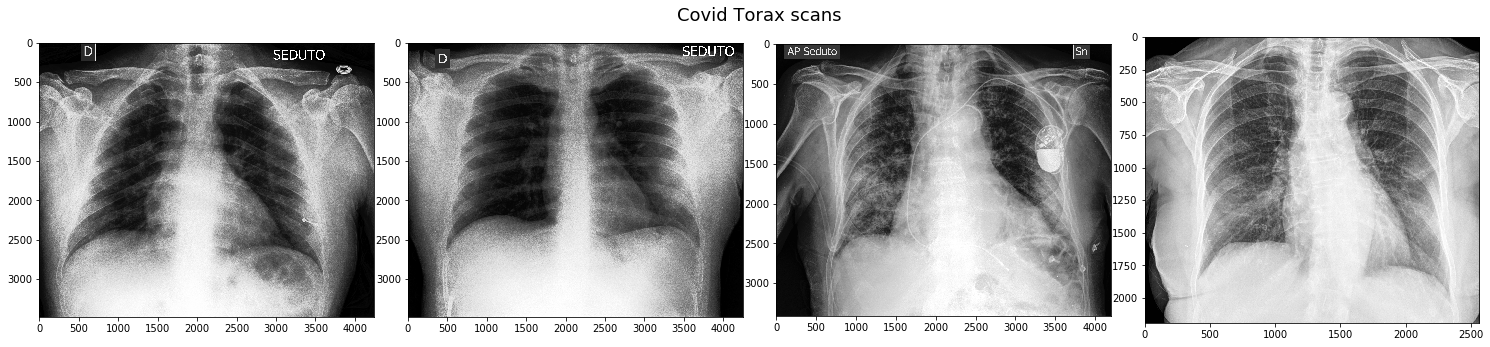

In [83]:
fig, axs = plt.subplots(1,4,figsize=(20,20))
fig.suptitle('Covid Torax scans', y=0.62, fontsize=18)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.1, hspace=0.3)
axs[0].imshow(imcor1)
axs[1].imshow(imcor2)
axs[2].imshow(imcor3)
axs[3].imshow(imcor4)
plt.show()

**Neumonia**

In [84]:
imneu1 = cv2.imread('data/Covid19-dataset/train/Viral Pneumonia/01.jpeg', cv2.COLOR_BGR2GRAY)
imneu2 = cv2.imread('data/Covid19-dataset/train/Viral Pneumonia/02.jpeg', cv2.COLOR_BGR2GRAY)
imneu3 = cv2.imread('data/Covid19-dataset/train/Viral Pneumonia/03.jpeg', cv2.COLOR_BGR2GRAY)
imneu4 = cv2.imread('data/Covid19-dataset/train/Viral Pneumonia/04.jpeg', cv2.COLOR_BGR2GRAY)

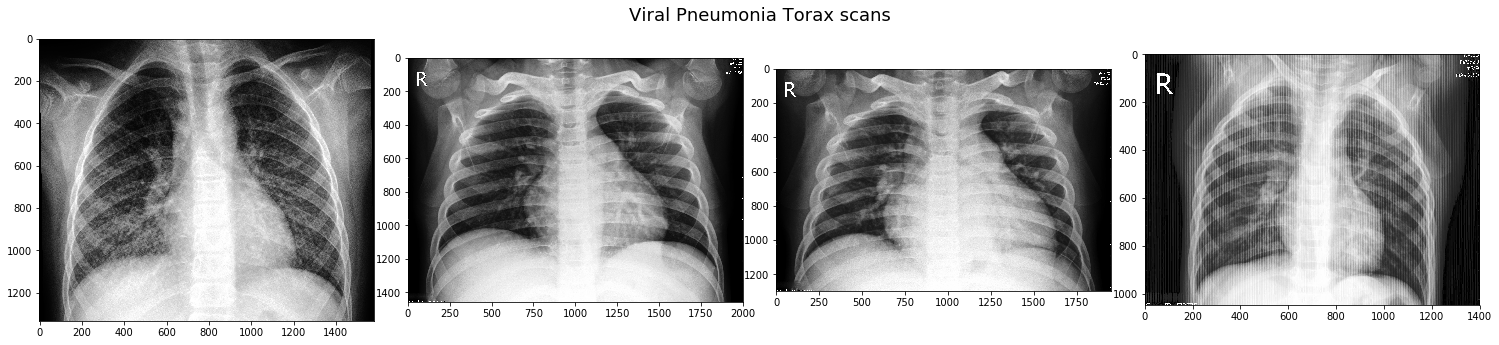

In [86]:
fig, axs = plt.subplots(1,4,figsize=(20,20))
fig.suptitle('Viral Pneumonia Torax scans', y=0.62, fontsize=18)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.1, hspace=0.3)
axs[0].imshow(imneu1)
axs[1].imshow(imneu2)
axs[2].imshow(imneu3)
axs[3].imshow(imneu4)
plt.show()

**Normal**

In [88]:
imnor1 = cv2.imread('data/Covid19-dataset/train/Normal/01.jpeg', cv2.COLOR_BGR2GRAY)
imnor2 = cv2.imread('data/Covid19-dataset/train/Normal/02.jpeg', cv2.COLOR_BGR2GRAY)
imnor3 = cv2.imread('data/Covid19-dataset/train/Normal/03.jpeg', cv2.COLOR_BGR2GRAY)
imnor4 = cv2.imread('data/Covid19-dataset/train/Normal/04.jpeg', cv2.COLOR_BGR2GRAY)

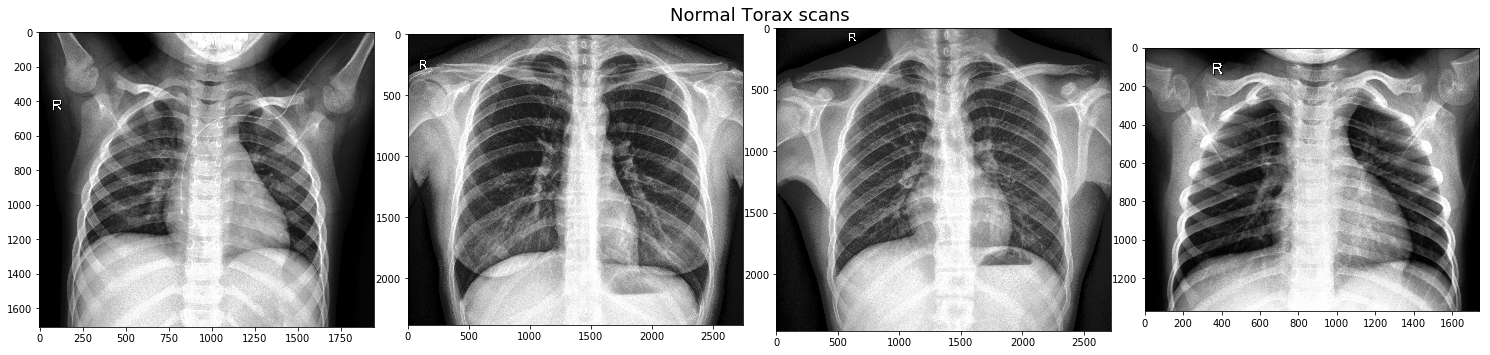

In [96]:
fig, axs = plt.subplots(1,4,figsize=(20,20))
fig.suptitle('Normal Torax scans', y=0.62, fontsize=18)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.1, hspace=0.3)
axs[0].imshow(imnor1)
axs[1].imshow(imnor2)
axs[2].imshow(imnor3)
axs[3].imshow(imnor4)
plt.show()

## Parametros de imagen ajustados

Analisis segun las siguientes condiciones:
    
    * dimesiones 100 x 100 (10000 pixeles).
    * en escala de grises

In [90]:
imgtest = cv2.imread('data/Covid19-dataset/train/Covid/021.jpeg', cv2.IMREAD_COLOR)

In [91]:
imgtest = cv2.cvtColor(imgtest, cv2.COLOR_BGR2GRAY)

In [92]:
imgtest = cv2.resize(imgtest, (100,100))

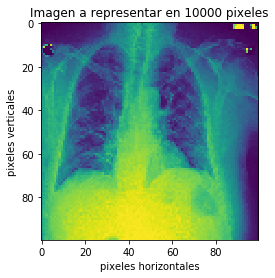

In [93]:
plt.imshow(imgtest)
plt.xlabel('pixeles horizontales')
plt.ylabel('pixeles verticales')
plt.title('Imagen a representar en 10000 pixeles')
plt.show()

In [94]:
imgtest.shape

(100, 100)

In [14]:
imgtest.flatten().shape

(40000,)

In [15]:
def new_dataset(dataset_path):
    '''
    creacion de nuevo dataset a partir de repositorio de imagenes
    dataset_path: ruta absoluta donde se encuentran las imagenes, test o train
    salida: tupla con:
        * matriz de dos dimensiones con mapa de bits de cada imagen (cada registro o lista de una dimension es una imagen) - Feature
        * lista de una dimension con valores numericos que representan la clase a la que pertenece la imagen - Target
        * lista de una dimension con las etiquetas de clase a la que pertenece cada imagen
    '''
    imgs_label = []
    imgs = []
    for pathlabel in os.listdir(dataset_path):
        label = os.path.join(dataset_path, pathlabel)
        for file in os.listdir(label):
            if re.search(pat, file) is not None:
                img = cv2.imread(os.path.join(label, file), cv2.IMREAD_COLOR)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                img = cv2.resize(img, (100,100))
                img = img.flatten()
                imgs.append(img)
                imgs_label.append(pathlabel)
                
    label_to_id_dict = {v:i for i,v in enumerate(np.unique(imgs_label))}
    label_ids = np.array([label_to_id_dict[x] for x in imgs_label])
    
    return np.array(imgs), label_ids, np.array(imgs_label)

**Creacion de variable target**

**Features**

In [16]:
test_X, test_y, test_labels = new_dataset(test_dataset_path)
train_X, train_y, train_labels = new_dataset(train_dataset_path)

In [17]:
train_X

array([[ 16,  15,  14, ...,  12,  14,  15],
       [131, 126, 129, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  2,   1,   1, ...,   1,   0,   2],
       [  2,   0,   0, ...,   0,   0,   1],
       [ 11,  11,   9, ..., 117,  97,  86]], dtype=uint8)

In [18]:
train_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
test_X.shape, test_y.shape, train_X.shape, train_y.shape

((66, 10000), (66,), (251, 10000), (251,))

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
# Instanciamos el modelo con su configuración por defecto
knn = KNeighborsClassifier()

In [22]:
# Ajustamos a los datos de entrenamiento
knn.fit(train_X, train_y)

KNeighborsClassifier()

In [23]:
# Predecimos etiquetas para los datos de test
y_pred = knn.predict(test_X)

In [24]:
# Evaluamos el accuracy del modelo
from sklearn.metrics import accuracy_score
accuracy_score(test_y, y_pred).round(2)

0.79

In [25]:
y_pred

array([1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [26]:
test_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

---

## Features y target como objetos de pandas

### Creacion de un dataset con test y train para luego aplicar una estrategia de stratify y kfolds

In [27]:
X_train, y_train, lbl_train = new_dataset(train_dataset_path)
X_test, y_test, lbl_test = new_dataset(test_dataset_path)

In [28]:
data_features = pd.DataFrame(np.append(X_train, X_test, axis=0))

In [29]:
data_features

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,16,15,14,15,15,14,255,14,15,15,...,3,1,6,7,12,12,15,12,14,15
1,131,126,129,118,117,114,125,122,125,136,...,40,8,0,0,0,0,0,0,0,0
2,0,0,0,3,10,21,35,53,63,68,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,28,28,28,28,28,28,28,...,10,17,17,17,17,17,17,0,0,0
4,4,8,11,15,17,12,18,22,23,23,...,4,8,17,12,23,20,22,20,20,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,57,57,57,57,57,57,57,57,57,57,...,170,152,121,101,80,64,58,56,57,57
313,3,2,2,2,2,0,2,2,1,2,...,106,110,125,99,92,76,53,37,21,2
314,222,177,180,181,180,181,181,184,72,72,...,164,165,161,154,138,126,112,109,105,100
315,7,8,8,8,7,7,7,6,6,5,...,36,28,2,2,5,8,10,11,12,30


In [30]:
data_target = pd.Series(np.append(y_train, y_test, axis=0))

In [31]:
data_features.shape, data_target.shape

((317, 10000), (317,))

In [32]:
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, stratify=data_target, random_state=0)

In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((237, 10000), (80, 10000), (237,), (80,))

In [34]:
y_train.value_counts(normalize=True)

0    0.434599
2    0.282700
1    0.282700
dtype: float64

In [35]:
y_test.value_counts(normalize=True)

0    0.4250
2    0.2875
1    0.2875
dtype: float64

In [36]:
# Instanciamos el modelo con su configuración por defecto
knn = KNeighborsClassifier()

In [37]:
# Ajustamos a los datos de entrenamiento
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [38]:
# Predecimos etiquetas para los datos de test
y_pred = knn.predict(X_test)

In [39]:
# Evaluamos el accuracy del modelo
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred).round(2)

0.85

In [40]:
y_pred

array([1, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 1, 2, 1, 0, 0, 2, 0, 2, 2, 1, 0,
       2, 2, 2, 2, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 2, 2, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 2, 1, 2, 2, 0, 0, 1, 2,
       2, 2, 0, 0, 2, 0, 0, 2, 1, 0, 2, 1, 2, 0])

In [41]:
np.array(y_test)

array([1, 0, 2, 0, 2, 0, 1, 2, 0, 2, 2, 1, 2, 2, 0, 0, 2, 0, 2, 2, 1, 0,
       2, 2, 2, 2, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0,
       0, 2, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2,
       2, 1, 0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 2, 0])

In [42]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=5, shuffle=True, random_state=0)

scores_para_df = []

for i in range(1, 21):
    
    # En cada iteración, instanciamos el modelo con un hiperparámetro distinto
    model = KNeighborsClassifier(n_neighbors=i)
    
    # cross_val_scores nos devuelve un array de 5 resultados,
    # uno por cada partición que hizo automáticamente CV
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
    
    # Para cada valor de n_neighbours, creamos un diccionario con el valor
    # de n_neighbours y la media y el desvío de los scores
    dict_row_score = {'score_medio':np.mean(cv_scores),
                      'score_std':np.std(cv_scores), 'n_neighbors':i}
    
    # Guardamos cada uno en la lista de diccionarios
    scores_para_df.append(dict_row_score)

In [43]:
df_knn_scores = pd.DataFrame(scores_para_df)
df_knn_scores.sort_values(by='score_medio', ascending=False).head(5)

,score_medio,score_std,n_neighbors
4,0.881915,0.031467,5
6,0.877748,0.040657,7
1,0.877748,0.023802,2
5,0.877660,0.033491,6
0,0.873670,0.034184,1


In [44]:
df_knn_scores['limite_superior'] = df_knn_scores['score_medio'] + df_knn_scores['score_std']
df_knn_scores['limite_inferior'] = df_knn_scores['score_medio'] - df_knn_scores['score_std']

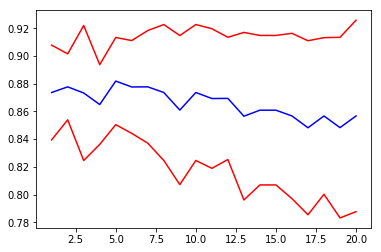

In [45]:
# Graficamos los resultados
plt.plot(df_knn_scores['n_neighbors'], df_knn_scores['limite_inferior'], color='r')
plt.plot(df_knn_scores['n_neighbors'], df_knn_scores['score_medio'], color='b')
plt.plot(df_knn_scores['n_neighbors'], df_knn_scores['limite_superior'], color='r');

In [46]:
df_knn_scores.loc[df_knn_scores.score_medio == df_knn_scores.score_medio.max()]

,score_medio,score_std,n_neighbors,limite_superior,limite_inferior
4,0.881915,0.031467,5,0.913382,0.850448


### Lo mismo pero estandarizando las variables

In [47]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [48]:
# Verificamos que las variables ahora tengan media 0 y desvío 1.
print('Medias:', np.mean(X_train, axis=0).round(2))
print('Desvio:', np.std(X_train, axis=0).round(2))

Medias: [ 0. -0.  0. ... -0. -0.  0.]
Desvio: [1. 1. 1. ... 1. 1. 1.]


In [49]:
# Calculamos nuevamente los scores de cross validation,
# pero esta vez sobre los features estandarizados:

scores_para_df_standard = []

for i in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=i)
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
    dict_row_score = {'score_medio':np.mean(cv_scores),
                      'score_std':np.std(cv_scores), 'n_neighbors':i}
    scores_para_df_standard.append(dict_row_score)

In [50]:
# Creamos el DataFrame a partir de la lista de diccionarios
df_knn_scores_standard = pd.DataFrame(scores_para_df_standard)
df_knn_scores_standard.sort_values(by='score_medio', ascending=False).head(5)

,score_medio,score_std,n_neighbors
9,0.907092,0.025637,10
6,0.907092,0.025637,7
5,0.902926,0.021755,6
7,0.902837,0.029058,8
0,0.894681,0.025947,1


In [51]:
# Armamos nuevamente los límites para graficar
df_knn_scores_standard['limite_superior'] = df_knn_scores_standard['score_medio'] + df_knn_scores_standard['score_std']
df_knn_scores_standard['limite_inferior'] = df_knn_scores_standard['score_medio'] - df_knn_scores_standard['score_std']
df_knn_scores_standard.sort_values(by='score_medio', ascending=False).head(5)

,score_medio,score_std,n_neighbors,limite_superior,limite_inferior
9,0.907092,0.025637,10,0.932729,0.881456
6,0.907092,0.025637,7,0.932729,0.881456
5,0.902926,0.021755,6,0.924681,0.881170
7,0.902837,0.029058,8,0.931895,0.873779
0,0.894681,0.025947,1,0.920628,0.868733


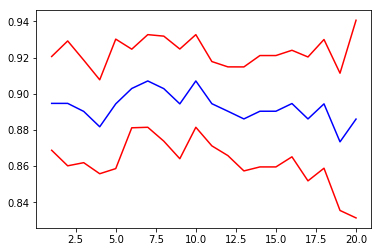

In [52]:
# Graficamos los resultados
plt.plot(df_knn_scores_standard['n_neighbors'], df_knn_scores_standard['limite_inferior'], color='r')
plt.plot(df_knn_scores_standard['n_neighbors'], df_knn_scores_standard['score_medio'], color='b')
plt.plot(df_knn_scores_standard['n_neighbors'], df_knn_scores_standard['limite_superior'], color='r');

In [53]:
# Identificamos el score máximo
df_knn_scores_standard.loc[df_knn_scores_standard.score_medio == df_knn_scores_standard.score_medio.max()]

,score_medio,score_std,n_neighbors,limite_superior,limite_inferior
6,0.907092,0.025637,7,0.932729,0.881456
9,0.907092,0.025637,10,0.932729,0.881456


Si bien el valor de _k_ óptimo vuelve a ser el mismo que antes, notamos que el _score_ promedio de la validación cruzada es varios puntos más alto que el que habíamos alcanzado sin la estandarización de las variables.

Ahora que decidimos cuál es el mejor preprocesamiento y el mejor valor posible para el hiperparámetro `n_neighbors`, podemos reentrenar el modelo y evaluar los resultados sobre _test_.

In [54]:
# Asignamos el valor del k óptimo a una variable
best_k = df_knn_scores_standard.loc[df_knn_scores_standard.score_medio == df_knn_scores_standard.score_medio.max(), 'n_neighbors'].values[0:2]
best_k

array([ 7, 10])

In [55]:
# Elegimos el modelo óptimo de acuerdo a las pruebas de cross validation
model = KNeighborsClassifier(n_neighbors=best_k[0])

# Lo ajustamos sobre los datos de entrenamiento
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [56]:
# Evaluamos qué accuracy obtenemos en train
accuracy_score(y_train, model.predict(X_train)).round(2)

0.91

En línea con los resultados que habíamos durante las pruebas de validación cruzada, nuestro KNN está alcanzando un _accuracy score_ del orden del 97% sobre los datos de entrenamiento. Veamos si es capaz de generalizar sobre el conjunto de testeo con una _performance_ similar.

In [57]:
# Lo utilizamos para predecir en test
X_test = scaler.transform(X_test) # ¡Importantísimo estandarizar también los datos de test con las medias y desvíos aprendidos en train!
y_pred = model.predict(X_test)

In [58]:
# Evaluamos el accuracy del modelo en test
accuracy_score(y_test, y_pred).round(2)

0.9

In [59]:
# Obtenemos la matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[33,  0,  1],
       [ 0, 18,  5],
       [ 1,  1, 21]])

#### 6. Graficar la matriz de confusión

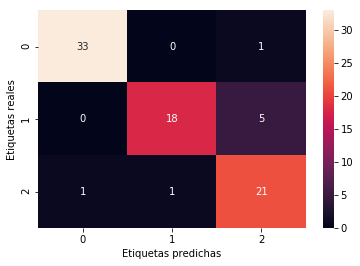

In [60]:
# Graficamos la matriz de confusión para visualizarla mejor
sns.heatmap(cm, annot=True)
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

In [61]:
y_test.shape

(80,)